In [26]:
%pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [27]:
import wbdata
import warnings 

warnings.filterwarnings('ignore')

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [96]:
indicators = {
    'SP.POP.TOTL': 'Population',
    'AG.PRD.CROP.XD': 'Crop_Production_Index',
    'AG.LND.CREL.HA': 'Land_Cereal',
    'AG.YLD.CREL.KG': 'Cereal_Yield',
    'NV.AGR.TOTL.ZS': 'Agri_GDP_Share',
    'SL.AGR.EMPL.ZS': 'Agri_Employment',
    'AG.LND.ARBL.ZS': 'Land_Arable_Pct',
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',
    'NE.GDI.FTOT.ZS': 'Capital_Investment',
    'SP.DYN.TFRT.IN': 'Fertility_Rate',
    'SP.DYN.LE00.IN': 'Life_Expectancy',
    'NY.GDP.PCAP.CD': 'GDP_per_Capita',
    'SE.SEC.ENRR.FE': 'Female_Education',
    'SM.POP.NETM': 'Net_Migration',
    "AG.PRD.LVSK.XD":"Livestock index",
    "AG.PRD.FOOD.XD":"Food index",
    "AG.PRD.CROP.XD":"Crop index"
}

              

In [97]:
SOM_DF = wbdata.get_dataframe(indicators, country='SOM', parse_dates=True).reset_index()

In [99]:
SOM_DF

,date,Population,Crop index,Land_Cereal,Cereal_Yield,Agri_GDP_Share,Agri_Employment,Land_Arable_Pct,Labor_Force_Total,Capital_Investment,Fertility_Rate,Life_Expectancy,GDP_per_Capita,Female_Education,Net_Migration,Livestock index,Food index
0,2024-01-01,19009151.0,NaN,NaN,NaN,NaN,30.285233,NaN,3441587.0,26.748559,NaN,NaN,629.538899,NaN,26859.0,NaN,NaN
1,2023-01-01,18358615.0,NaN,353642.0,503.5,NaN,30.526100,1.753435,3319369.0,23.608323,6.132,58.816,596.885985,2.75847,46217.0,NaN,NaN
2,2022-01-01,17801897.0,101.37,353638.0,396.0,NaN,30.883990,1.753435,3211325.0,23.649907,6.255,53.931,573.141166,NaN,-92434.0,98.64,98.94
3,2021-01-01,17271431.0,101.06,353635.0,314.0,NaN,30.955484,1.753435,3090758.0,17.979542,6.353,55.703,549.056995,NaN,35506.0,99.67,99.82
4,2020-01-01,16651191.0,100.95,353654.0,503.5,NaN,30.050432,1.753435,2972858.0,16.006027,6.453,57.095,518.161133,NaN,77259.0,100.04,100.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1964-01-01,3192796.0,63.49,511000.0,463.8,64.513591,NaN,1.444193,NaN,NaN,7.261,44.393,71.889940,NaN,1518.0,53.80,54.97
61,1963-01-01,3110361.0,61.17,520000.0,467.3,64.032671,NaN,1.436223,NaN,NaN,7.258,44.194,69.492234,NaN,1449.0,51.99,53.11
62,1962-01-01,3030091.0,59.22,515000.0,485.4,64.947059,NaN,1.428253,NaN,NaN,7.255,43.972,67.170236,NaN,1496.0,49.41,50.52
63,1961-01-01,2952054.0,58.22,521000.0,489.4,64.163654,NaN,1.420282,NaN,NaN,7.252,43.667,64.924258,NaN,1336.0,47.85,49.07


In [100]:
cols_to_fix = [col for col in SOM_DF.columns if col != 'date']

SOM_DF[cols_to_fix] = SOM_DF[cols_to_fix].apply(pd.to_numeric, errors='coerce')

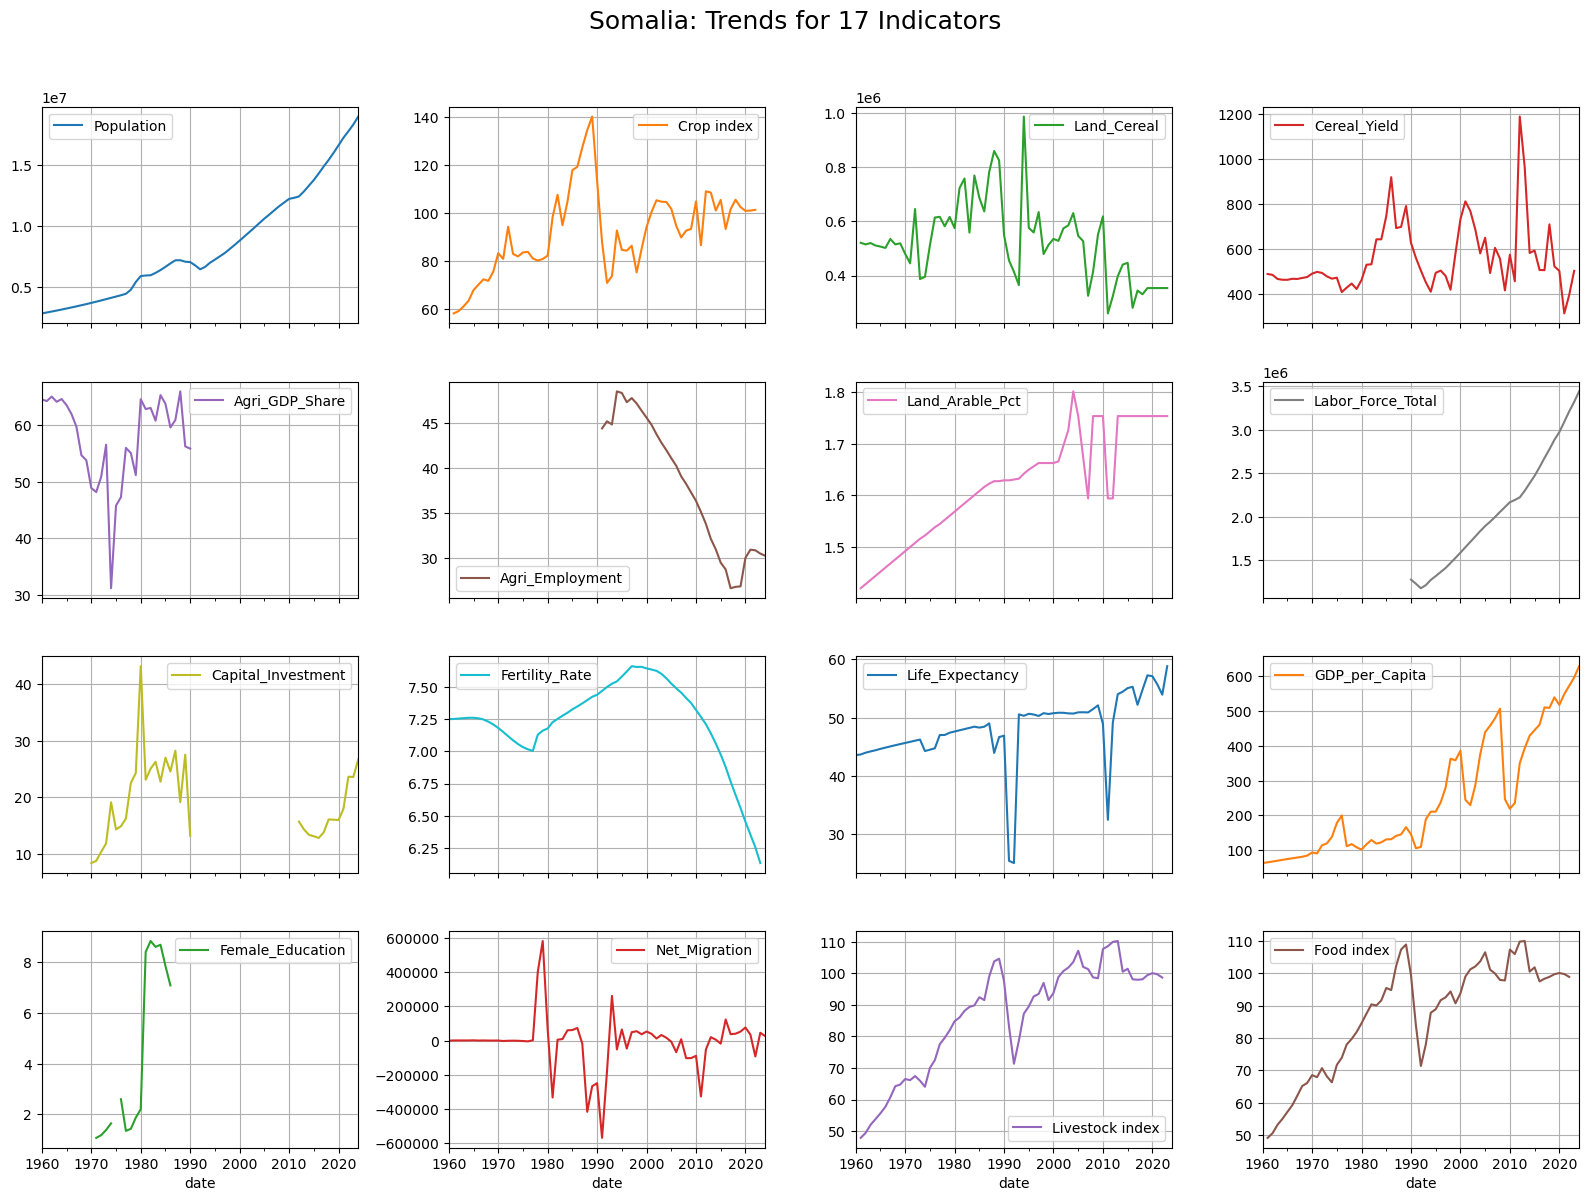

In [101]:
num_indicators = len(SOM_DF.columns) 

SOM_DF.set_index('date').sort_index().plot(
    subplots=True, 
    layout=(5, 4),       
    figsize=(16, 14),    
    sharex=True, 
    grid=True
)

plt.suptitle(f"Somalia: Trends for {num_indicators} Indicators", fontsize=18, y=1.02)

plt.tight_layout() 
plt.show()

In [102]:
SOM_DF.columns

Index(['date', 'Population', 'Crop index', 'Land_Cereal', 'Cereal_Yield',
       'Agri_GDP_Share', 'Agri_Employment', 'Land_Arable_Pct',
       'Labor_Force_Total', 'Capital_Investment', 'Fertility_Rate',
       'Life_Expectancy', 'GDP_per_Capita', 'Female_Education',
       'Net_Migration', 'Livestock index', 'Food index'],
      dtype='object')

## Predicting Crop Index using indicators of land, labor and capital

It was shown in lecture that:

$$
    \text{Crop output} = F(\mbox{Land},\mbox{Labor},\mbox{Capital}).
 $$


In this section, we will try to fit a multiple linear regression model using different indicators for land, labor and capital

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
features = ['Land_Cereal', 'Cereal_Yield', 'Agri_GDP_Share', 
            'Agri_Employment', 'Land_Arable_Pct', 'Labor_Force_Total', 'Capital_Investment']
target = 'Crop index'

df_reg = SOM_DF[['date', target] + features].copy()

for col in [target] + features:
    df_reg[col] = pd.to_numeric(df_reg[col], errors='coerce')
    df_reg[col] = df_reg[col].fillna(df_reg[col].mean())

df_reg = df_reg.sort_values('date')

In [105]:
split_idx = int(len(df_reg) * 0.8)
train_df = df_reg.iloc[:split_idx]
test_df = df_reg.iloc[split_idx:]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

print(f"Training on {len(X_train)} years, Testing on {len(X_test)} years.")

Training on 52 years, Testing on 13 years.


In [112]:
# 4. Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

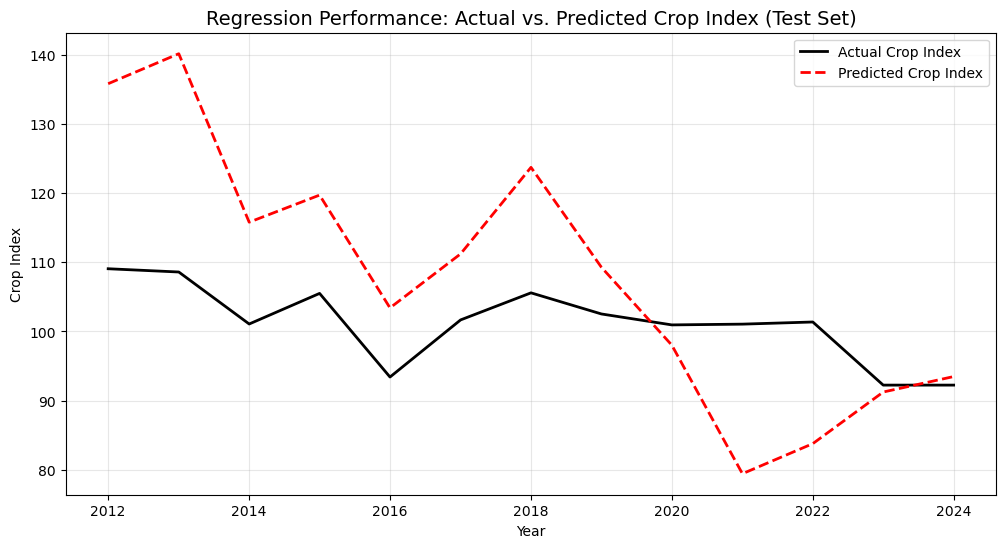

In [113]:
plt.figure(figsize=(12, 6))


plt.plot(test_df['date'], y_test, label='Actual Crop Index', color='black', linewidth=2)


plt.plot(test_df['date'], y_pred, label='Predicted Crop Index', linestyle='--', color='red', linewidth=2)

plt.title("Regression Performance: Actual vs. Predicted Crop Index (Test Set)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Crop Index")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()